# Supervised Learning with Exploratory Data Analysis - Week 8 Core Independent Project

## 1. Defining the Question

### a) Specifying the Question

To study the factors that cause hypothyroidism & build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [5]:
#Importing the relevant libraries

import pandas as pd

import six
import sys
sys.modules['sklearn.externals.six']= six

import numpy as np

import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction import DictVectorizer

import xgboost as xgb

from sklearn.model_selection import cross_val_score

from sklearn_pandas import DataFrameMapper, CategoricalImputer

from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn import metrics

from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO  

from IPython.display import Image  

import pydotplus

from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Loading the Dataset
# Dataset url = 
#


# Load the dataset
sick = pd.read_csv('hypothyroid.csv')
sick.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [8]:
sick.shape 

(3163, 26)

In [9]:
sick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

## 3. Checking the Data

In [15]:
# Determining the no. of records in our dataset
#
sick.describe() .T

,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


In [11]:
# Previewing the top of our dataset
#
sick.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [12]:
sick.tail

<bound method NDFrame.tail of            status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
0     hypothyroid  72   M            f  ...            y   10            n   ?
1     hypothyroid  15   F            t  ...            y   17            n   ?
2     hypothyroid  24   M            f  ...            y    0            n   ?
3     hypothyroid  24   F            f  ...            y    6            n   ?
4     hypothyroid  77   M            f  ...            y   44            n   ?
...           ...  ..  ..          ...  ...          ...  ...          ...  ..
3158     negative  58   F            f  ...            y   95            n   ?
3159     negative  29   F            f  ...            y   98            n   ?
3160     negative  77   M            f  ...            y  104            n   ?
3161     negative  74   F            f  ...            y  137            n   ?
3162     negative  56   F            t  ...            y  143            n   ?

[3163 rows x 26 colum

In [13]:
# Checking whether each column has an appropriate datatype
#
sick.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [18]:
sick.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,2717,3090,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,2695,3163,2468,3163,2914,3163,2915,3163,2916,3163,260
unique,2,92,2,2,2,2,2,2,2,2,2,2,2,2,2,239,2,69,2,268,2,158,2,280,2,52
top,negative,59,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1.60,y,98,y,0.98,y,98,n,28
freq,3012,64,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,141,2914,50,2915,86,2916,55,2903,14


In [16]:
# Checking for missing values

sick.isnull().sum()

# Shows that null values do not exist in our dataset
# However, '?' are not considered as null values although they exist in our dataset
# Therefore this '?' signs should be replaced with zeros

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [17]:
# Replacing '?' with zeros

sick = sick.replace(['?'], np.nan)
sick.isnull().sum().sum()

# There are 5329 entries with the '?' symbol
# which have been replaced with the zeros/null

5329

In [23]:
# changing the column datatypes by creating arrays of numerical columns
# and categorical columns

# Creating a copy
df = sick

categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

# Numerical columns array 
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types

for column in sick.columns:
  if column in numerical_columns:
    sick[column]= pd.to_numeric(sick[column])
  
  else:
    sick[column] = sick[column].astype('category')
    
    
# Confirming changes

sick.dtypes

# The data types have now been set correctly

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [65]:
# Checking for the unique values in the dataset
# We will use a for loop to iterate through the different columns
#

for x in df.columns:
  
  print(x)
  print(df[x].unique(),'\n')

status
['hypothyroid', 'negative']
Categories (2, object): ['hypothyroid', 'negative'] 

age
[72.         15.         24.         77.         85.         64.
 20.         42.         69.         75.         53.         59.
 68.         50.         78.         65.         28.         43.
 40.         84.         51.15421421 83.         63.         73.
 36.         27.         48.         71.         60.         34.
 79.         62.         74.         32.         41.         70.
 29.          5.         58.         35.         51.         22.
 16.         44.         39.         47.         18.         17.
 88.         56.         30.         45.         66.         52.
 54.         80.         33.         38.         92.         67.
 46.         13.         89.         61.         49.         26.
 57.         31.         90.         81.         25.         37.
 76.         87.         23.         55.         86.         98.
 21.         97.          1.          6.         14.         8

In [66]:
# Replacing the null values in the age column with the mean age

df['age']= df['age'].fillna(df['age'].mean(), axis = 0)

In [67]:
# Replacing the null values in the sex column with the modal value

df['sex']= df['sex'].fillna(df['sex'].mode(), axis = 0)

In [68]:
# Replacing the null values with zeroes
# Defining the array of numerical columns to use.

numerical_columns_2 = ['TSH','T3', 'TT4', 'T4U', 'FTI']

#dropping the null values and assigning the resultant values to a new dataframe
df[numerical_columns_2] = df[numerical_columns_2].fillna(0)

In [69]:
sick.duplicated().sum()

77

In [70]:
# Dropping of duplicated entries since they cause noise in the model

df = df.drop_duplicates()

# Confirming the dropping of duplicates

df.duplicated().sum()

# 0 indicates there are no duplicated entries

0

In [86]:
# Checking for Anomalies
#

#Checking for annomalies
# Checking for Outliers
#

Q1 = sick.quantile(0.25)
Q3 = sick.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age    26.00
TSH     1.80
T3      1.70
TT4    48.00
T4U     0.23
FTI    41.00
TBG    13.00
dtype: float64


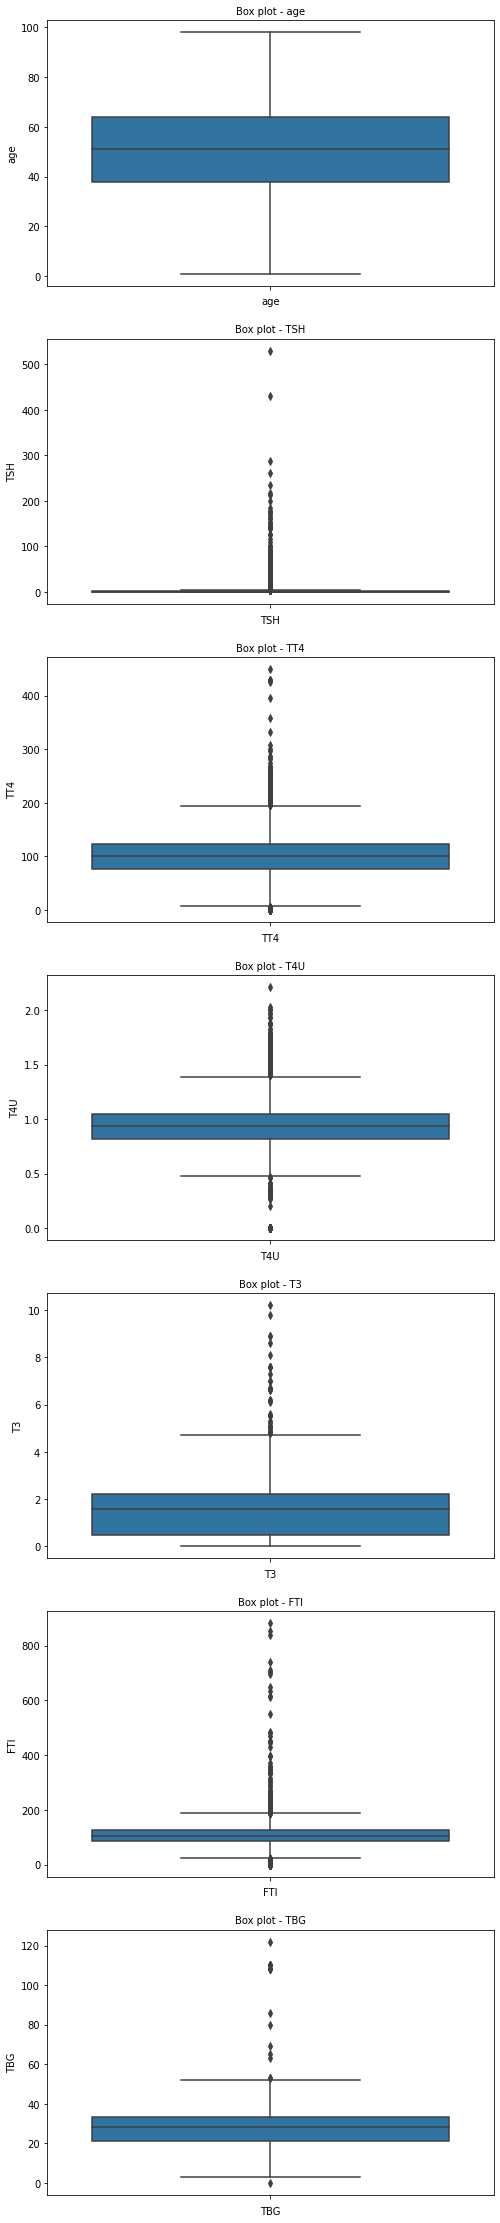

In [36]:
#Plotting the box plot for columns with outliers

col_names = ['age', 'TSH', 'TT4', 'T4U', 'T3', 'FTI', 'TBG']

fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=df[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

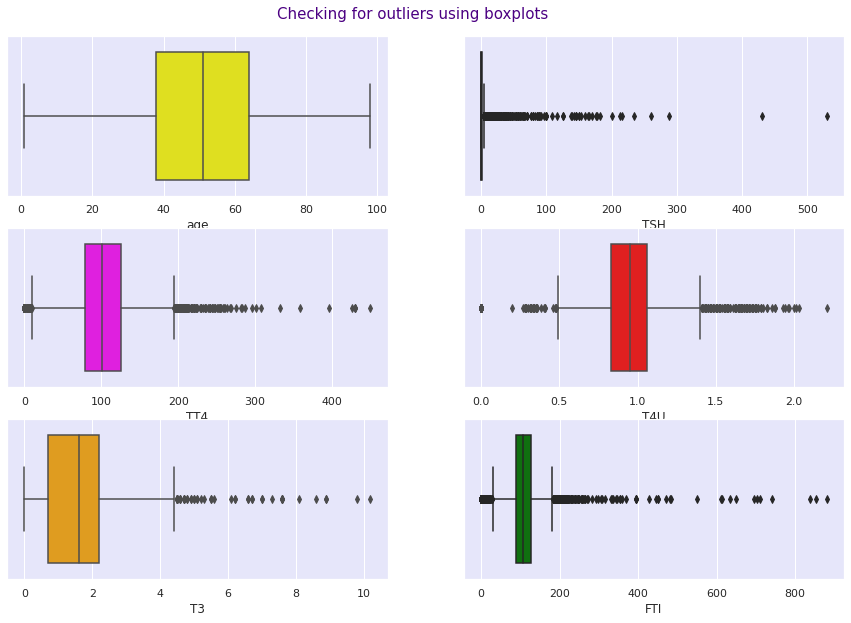

In [79]:
import seaborn as sns

cols = ['age', 'TSH', 'TT4', 'T4U', 'T3', 'FTI', 'TBG']
colors = [ 'yellow', 'green', 'fuchsia', 'red', 'orange','green']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), df, cols, colors):
  sns.boxplot(df[column], ax = ax, color = color)
  ax.set_facecolor('lavender')
  

In [ ]:
# Removing outliers
house = house[~((house < (Q1 - 1.5 * IQR)) |(house > (Q3 + 1.5 * IQR))).any(axis=1)]
house.shape

(16612, 14)

## 6. Exploratory Analysis

In [37]:
# Ploting the univariate summaries and recording our observations
#
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,251.000000
mean,51.118453,4.952793,1.507583,100.252722,0.901850,106.582275,31.070120
std,17.854437,22.276447,1.179190,51.795700,0.339608,65.484772,19.421922
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,0.500000,77.000000,0.820000,85.000000,21.000000
50%,51.154214,0.400000,1.600000,100.000000,0.940000,105.000000,28.000000
75%,64.000000,1.700000,2.200000,124.000000,1.050000,126.000000,33.500000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


In [38]:
#creating a copy and dropping the TBG column since it has too many null values which
#means that it does not give any meaningful information. 
df = df.drop(['TBG'], axis =1)

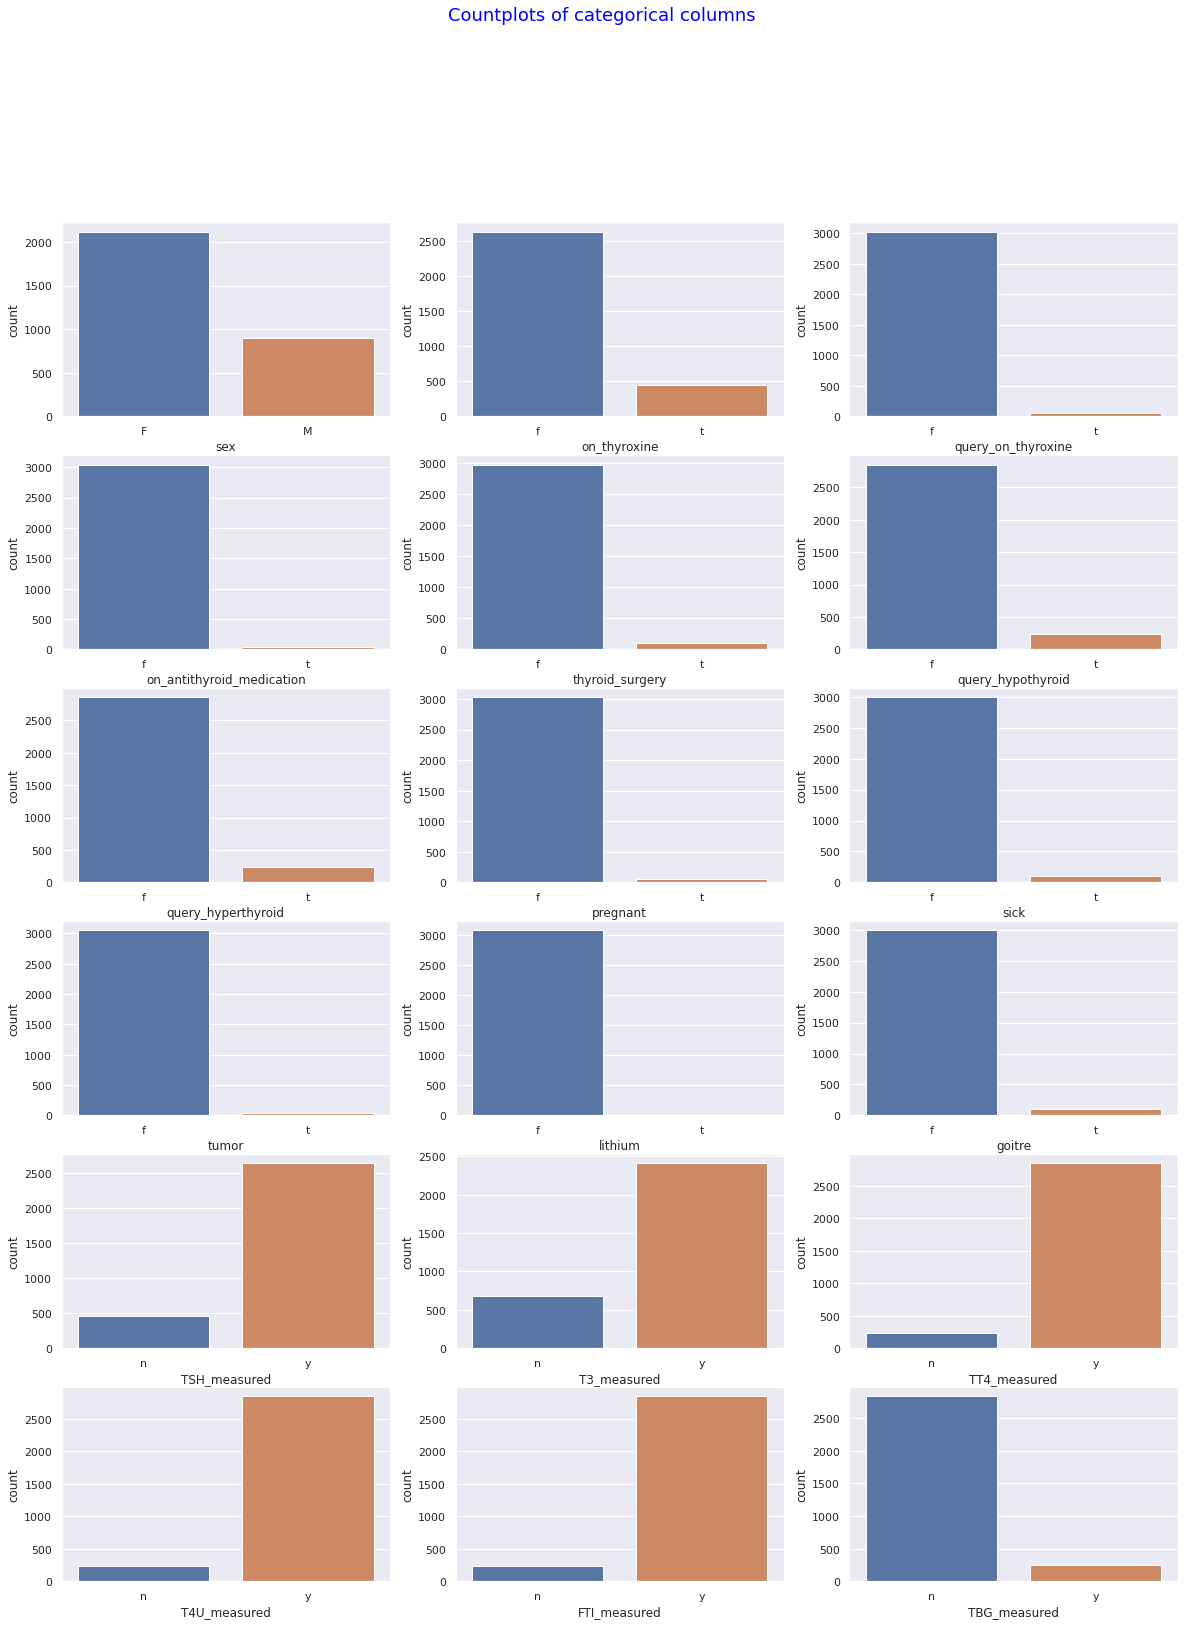

In [39]:
# Count plot of categorical columns in the dataset

categorical_columns_1 =[ 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured']


sb.set(style = 'darkgrid', context = 'notebook')
corr = df.corr()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), df, categorical_columns_1):
   sb.countplot(df[column], ax=ax)

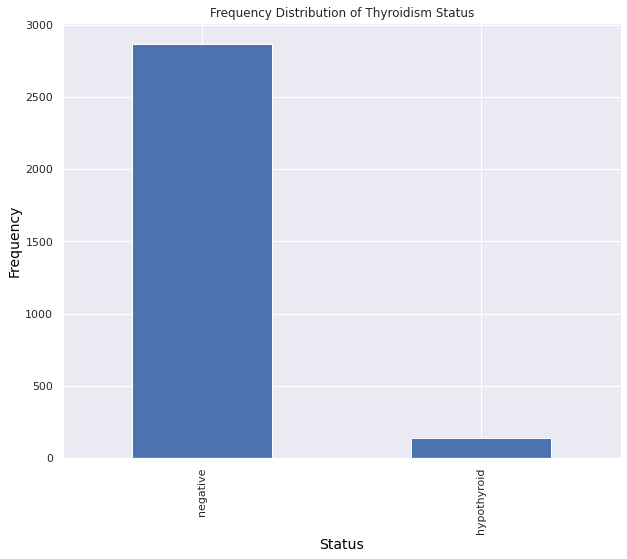

In [71]:
# Checking for the frequency distribution of our target variable Using a bar plot.

fig, ax = plt.subplots(figsize = (10, 8))

df['status'].value_counts().plot.bar(title = 'Frequency Distribution of Thyroidism Status')
plt.xlabel('Status', color = 'black', fontsize = 14)
plt.ylabel('Frequency', color = 'black', fontsize = 14)
plt.show()

From the data, most of the sampled patients(about 2900 patients) tested negative to having hypothyroidism while less than 500 patients were confirmed to have hypothyroidism.

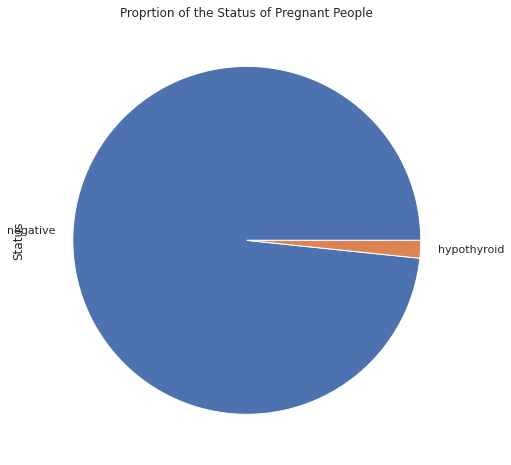

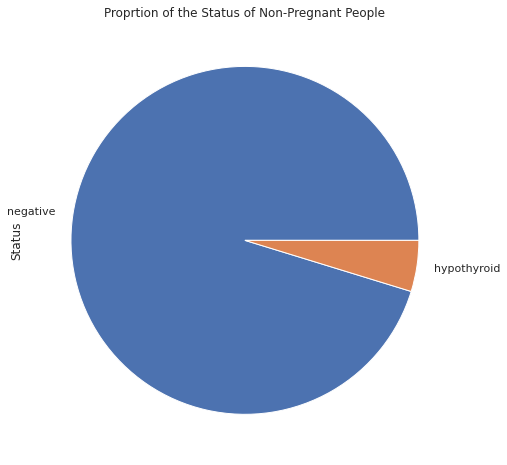

In [81]:
# Investigating the proportion of status of the patients who are pregnant and those that are not.

fig, ax = plt.subplots(figsize = (12, 8))

df[df['pregnant'] == 't']['status'].value_counts().plot.pie(title = 'Proprtion of the Status of Pregnant People')
plt.ylabel('Status')
plt.show()


fig, ax = plt.subplots(figsize = (12, 8))
df[df['pregnant'] == 'f']['status'].value_counts().plot.pie(title = 'Proprtion of the Status of Non-Pregnant People')
plt.ylabel('Status')
plt.show()

**b) Bivariate Analysis**

In [41]:
#Exporting the clean dataset:
#Correlation matrix.

matrix = df.corr()
matrix

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.011431,-0.074543,-0.000089,-0.024815,0.074604
TSH,0.011431,1.000000,-0.083445,-0.219696,0.096258,-0.183648
T3,-0.074543,-0.083445,1.000000,0.493887,0.455964,0.326356
TT4,-0.000089,-0.219696,0.493887,1.000000,0.600486,0.758395
T4U,-0.024815,0.096258,0.455964,0.600486,1.000000,0.196093
FTI,0.074604,-0.183648,0.326356,0.758395,0.196093,1.000000


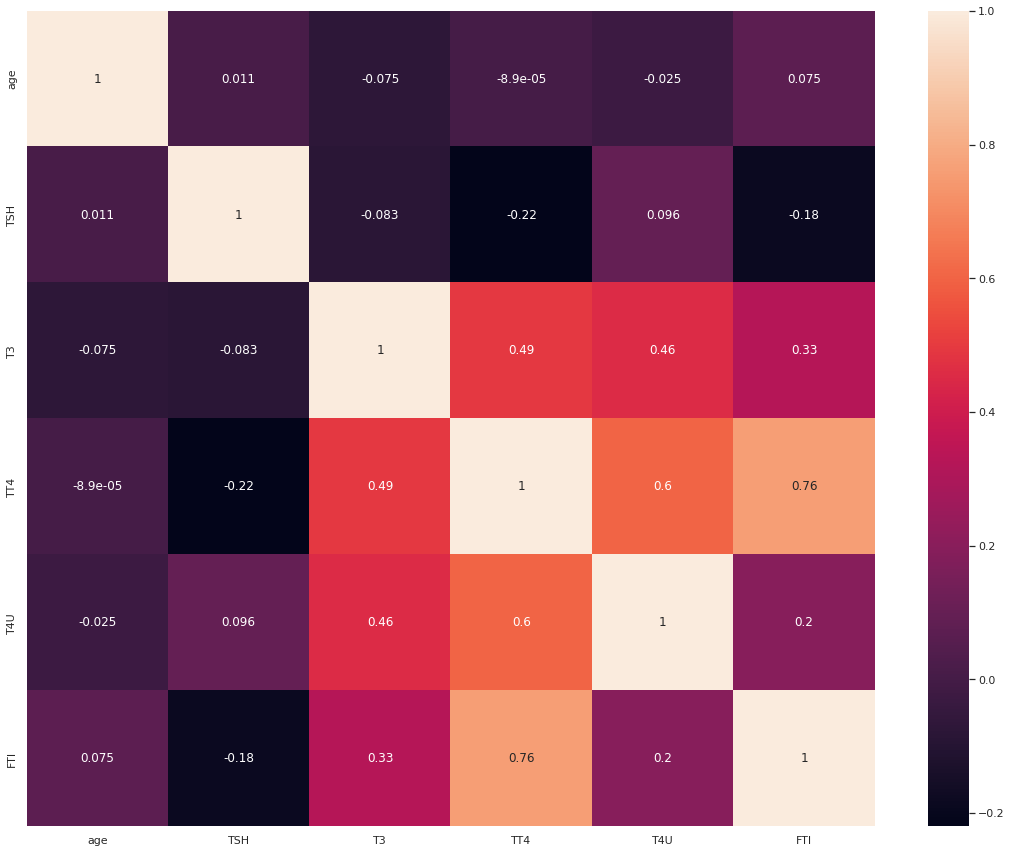

In [42]:
#Plottting a heatmap to show correlation of different numerical variables
f = plt.figure(figsize=(19, 15))
sns.heatmap(df.corr(), xticklabels = df.corr().columns, yticklabels = df.corr().columns, annot=True)

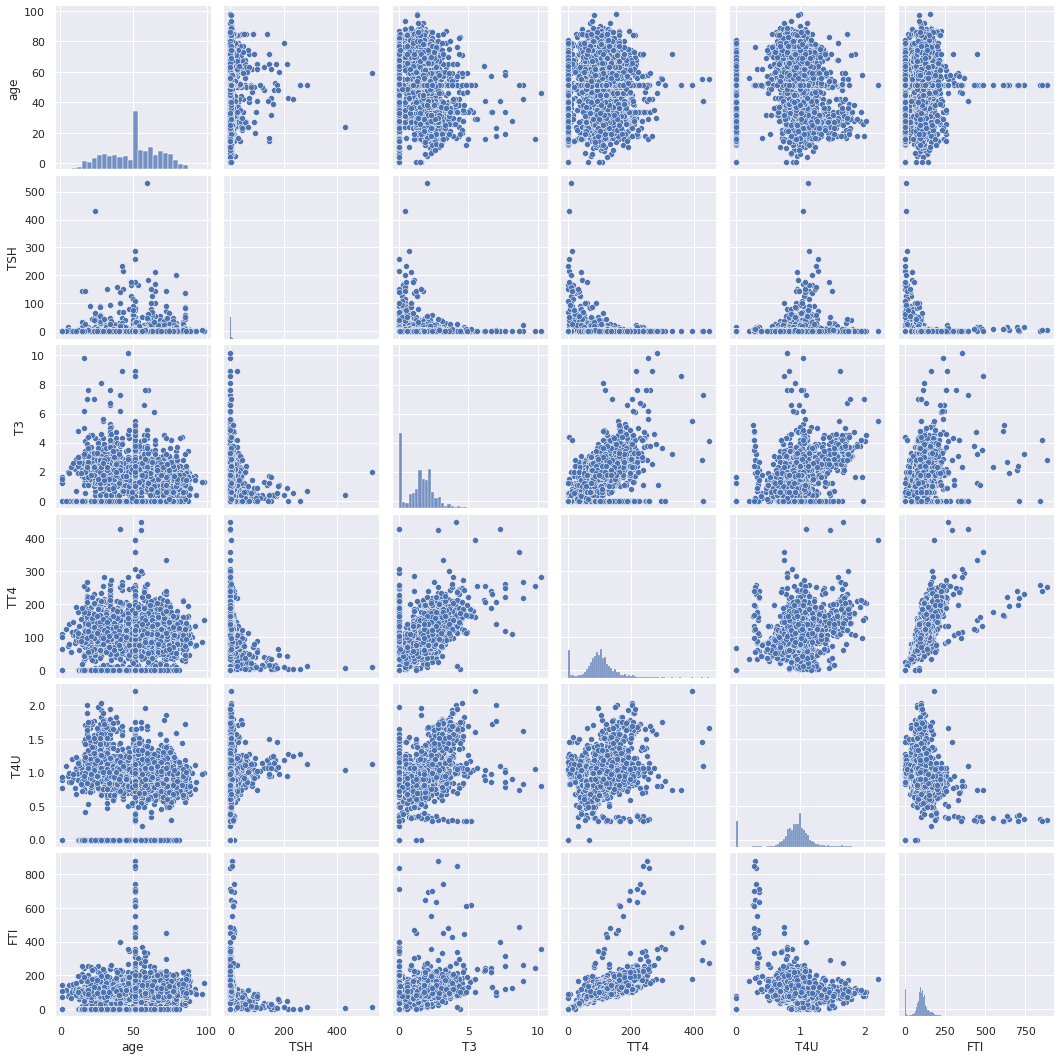

In [44]:
# Use of a pairplot to check for correlation between variables.

sns.pairplot(df, kind = 'scatter', dropna = False)
plt.show()

## 7. Implementing the Solution

The base Model using Logistic Regression

In [45]:
# Creating a baseline model, i.e logistic regression
# Importing the relevant libraries

from sklearn.linear_model import LogisticRegression

X = df.drop('status', axis=1)

X = pd.get_dummies(X)

#train_features = X
y = df.status.cat.codes

# Split the independent and dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)


In [46]:
print('accuracy_score:',accuracy_score (y_test , y_pred))
print('F1_score:',f1_score(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# The Baseline Model has an accuracy score of 98% as seen from the F1 score

accuracy_score: 0.9881209503239741
F1_score: 0.9938236945536214


array([[ 30,   9],
       [  2, 885]])

**Decision Trees**

Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)

forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.head(5)

,Actual,Predicted
1188,1,1
1205,1,1
713,1,1
2791,1,1
1318,1,1


In [49]:
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print('accuracy_score:',accuracy_score (y_test , y_pred))

print('F1_score:',f1_score(y_test, y_pred))

R2 score : 0.73
accuracy_score: 0.9892008639308856
F1_score: 0.994388327721661


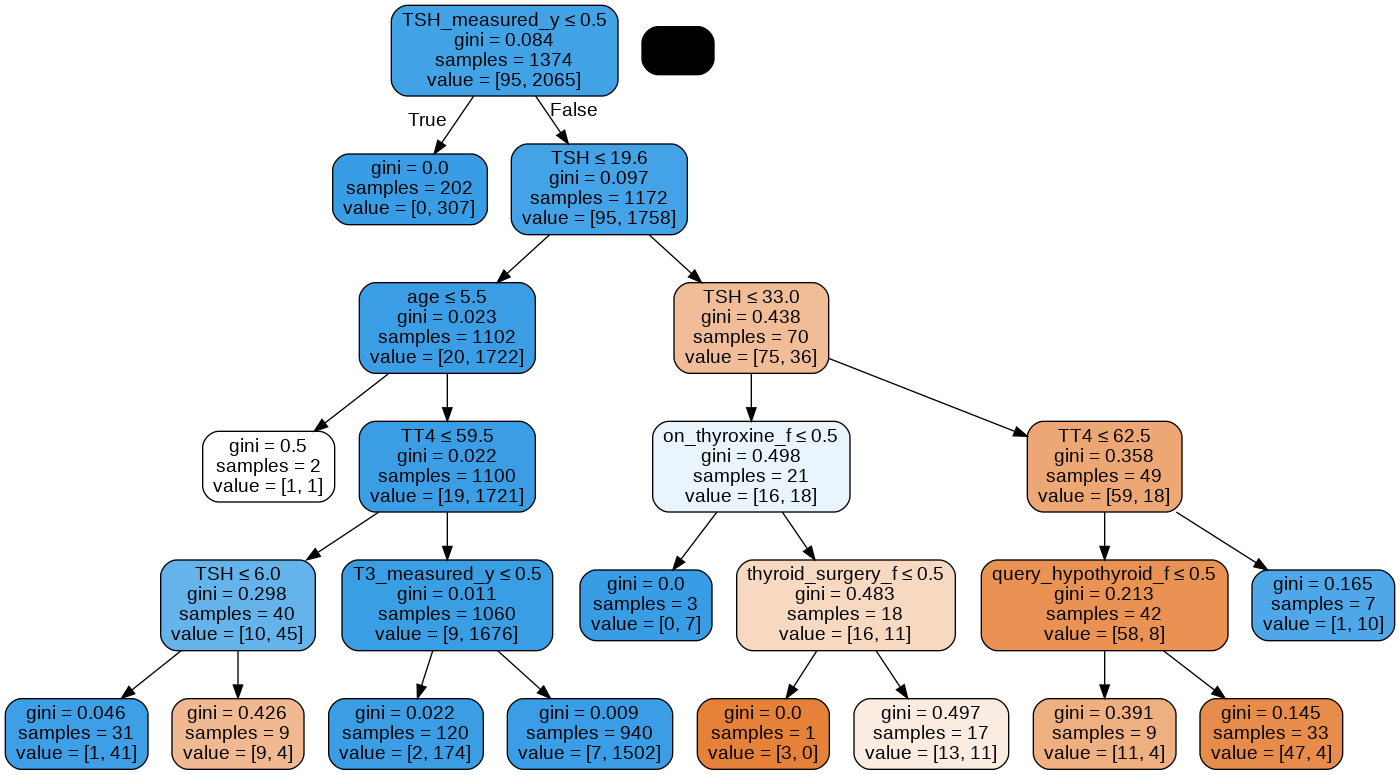

In [50]:
# Visualizing tree number 25

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

y_pred = forest.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; 

tree = forest.estimators_[25]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

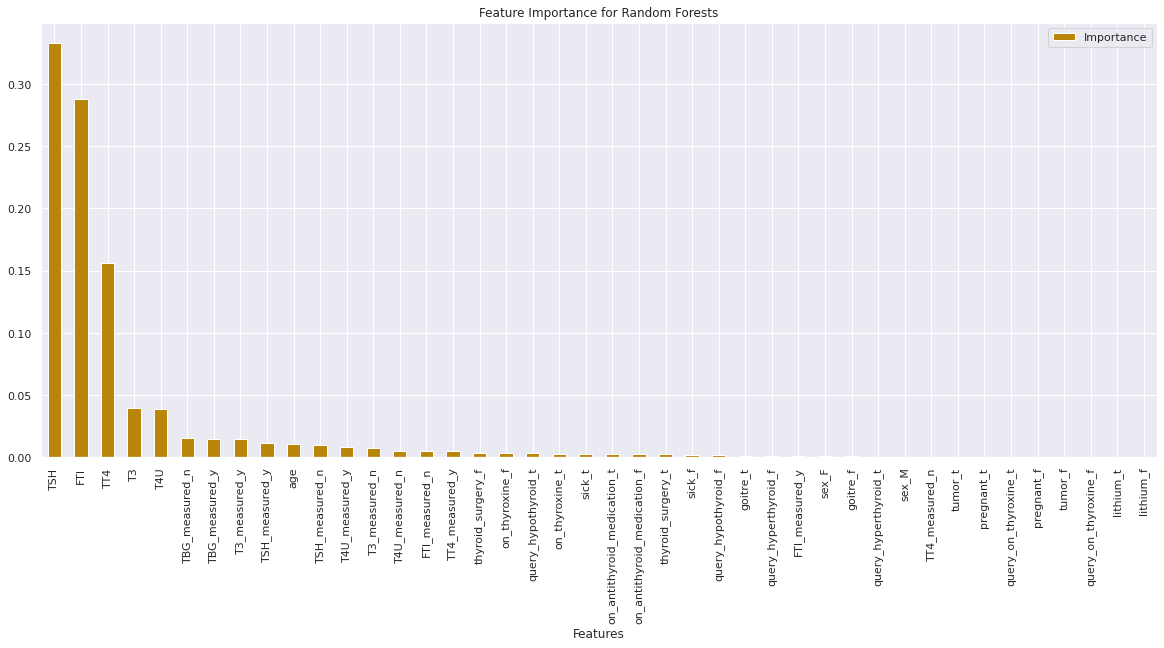

In [51]:
# Getting the feature importance

pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for Random Forests',figsize = (20, 8), color = 'darkgoldenrod')
plt.show()

**Ada boost**

In [53]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

params = {'n_estimators' : [250, 300, 450, 500, 600]}

ada_boost = AdaBoostClassifier()

search = GridSearchCV(ada_boost, scoring = 'accuracy', param_grid = params, cv = 10)

search.fit(X, y)

search.best_params_

{'n_estimators': 250}

In [54]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=250, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_ada))

print('F1_score:',f1_score(y_test, y_pred))
# The accuracy score is 99.5 which is a very high score

Accuracy score: 0.9924406047516199
F1_score: 0.994388327721661


**Gradient Boosted Trees**

In [55]:
# Importing the relevant libraries

from sklearn.ensemble import GradientBoostingClassifier

target_number_of_trees = 250

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred_ada))
print("R2 score : %.2f" % r2_score(y_test,y_pred_gbc))
print('F1_score:',f1_score(y_test, y_pred))

Accuracy score: 0.9924406047516199
R2 score : -0.04
F1_score: 0.994388327721661


**SVM Model**

In [58]:
# Kernel = Polynomial
# Selecting the independent variables and the target variable
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
X = df[['FTI', 'TSH']].values
y = np.where(df.status == 'hypothyroid', 1, 0)

# Instantiating and creating a list of models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  f1 = [f1]
  # Returning the accuracy and the model
  return acc, f1, model

In [59]:
# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')


The accuracy score of Polynomial is: 0.9827213822894169 and the f1 score is: [0.7500000000000001]
The accuracy score of Linear is: 0.9794816414686826 and the f1 score is: [0.7164179104477612]
The accuracy score of Rbf is: 0.9848812095032398 and the f1 score is: [0.7941176470588235]


**Conclusion**

After a thorough and exhaustive analysis using the models above, we see that the difference between the different models accuracy scores does not have a very big margin.

However the Ada Boost and Gradient Descent Decision Trees have the highest accuracy scores and would thus recommend this to be used for analysis.

**8. Challenging the solution**

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?